In [5]:
import pandas as pd
import numpy as np
import warnings
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import keras
import geopandas as gpd
#import glob
warnings.filterwarnings('ignore')
os.chdir("Dataopen_1109")

In [6]:
jobs = pd.read_csv("job_listings.csv")

In [7]:
jobs.created_time = pd.to_datetime(jobs.created)
jobs.last_checked_time = pd.to_datetime(jobs.last_checked)

jobs["created_year"] = pd.DatetimeIndex(jobs.created_time).year

In [9]:
jobs2014 = jobs[jobs.created_year == 2014]
jobs2015 = jobs[jobs.created_year == 2015]
jobs2016 = jobs[jobs.created_year == 2016]
jobs2017 = jobs[jobs.created_year == 2017]
jobs2018 = jobs[jobs.created_year == 2018]
jobs2019 = jobs[jobs.created_year == 2019]

In [8]:
for i in range(10):
    print(jobs2015[jobs2015.SOC_occupation_code < 2000].shape)


NameError: name 'jobs2015' is not defined

In [10]:
labor_2014 = []
labor_2015 = []
labor_2016 = []
labor_2017 = []
labor_2018 = []
labor_2019 = []

for i in range(1,10):
    labor_2014.append(np.array([(i*1000<jobs2014["SOC_occupation_code"]) & (jobs2014["SOC_occupation_code"] < (i+1)*1000)]).sum())
labor_2014 = pd.Series(labor_2014)

for i in range(1,10):
    labor_2015.append(np.array([(i*1000<jobs2015["SOC_occupation_code"]) & (jobs2015["SOC_occupation_code"] < (i+1)*1000)]).sum())
labor_2015 = pd.Series(labor_2015)

for i in range(1,10):
    labor_2016.append(np.array([(i*1000<jobs2016["SOC_occupation_code"]) & (jobs2016["SOC_occupation_code"] < (i+1)*1000)]).sum())
labor_2016 = pd.Series(labor_2016)

for i in range(1,10):
    labor_2017.append(np.array([(i*1000<jobs2017["SOC_occupation_code"]) & (jobs2017["SOC_occupation_code"] < (i+1)*1000)]).sum())
labor_2017 = pd.Series(labor_2017)

for i in range(1,10):
    labor_2018.append(np.array([(i*1000<jobs2018["SOC_occupation_code"]) & (jobs2018["SOC_occupation_code"] < (i+1)*1000)]).sum())
labor_2018 = pd.Series(labor_2018)

for i in range(1,10):
    labor_2019.append(np.array([(i*1000<jobs2019["SOC_occupation_code"]) & (jobs2019["SOC_occupation_code"] < (i+1)*1000)]).sum())
labor_2019 = pd.Series(labor_2019)


#print(labor_2015)
'''
for i in range(1,10):
    print(np.array([(i*1000<jobs2016["SOC_occupation_code"]) & (jobs2016["SOC_occupation_code"] < (i+1)*1000)]).sum())
'''

'\nfor i in range(1,10):\n    print(np.array([(i*1000<jobs2016["SOC_occupation_code"]) & (jobs2016["SOC_occupation_code"] < (i+1)*1000)]).sum())\n'

In [11]:
job_year_level = pd.DataFrame(np.array([labor_2014,labor_2015,labor_2016,labor_2017,labor_2018,labor_2019]))
job_year_level = job_year_level.transpose()
job_year_level.columns=["2014","2015","2016","2017","2018","2019"]
#job_year_level.indexs = [str(j*1000) for j in range(1,10)]
job_year_level
#np.array([labor_2014,labor_2015,labor_2016,labor_2017,labor_2018,labor_2019])

,2014,2015,2016,2017,2018,2019
0,40370,43011,34756,49029,64619,41186
1,43666,45292,43946,85915,109592,79310
2,35032,38721,32954,51625,68465,43344
3,8169,10942,14554,21025,15715,6854
4,21230,23445,11004,20482,23669,25988
5,4330,4700,6934,12518,11727,6409
6,105209,93642,85421,96427,118220,58830
7,6956,9626,7107,14594,18455,8928
8,62283,74595,60655,158174,144703,107045


In [12]:
job_year_level

,2014,2015,2016,2017,2018,2019
Series 1000,40370,43011,34756,49029,64619,41186
Series 2000,43666,45292,43946,85915,109592,79310
Series 3000,35032,38721,32954,51625,68465,43344
Series 4000,8169,10942,14554,21025,15715,6854
Series 5000,21230,23445,11004,20482,23669,25988
Series 6000,4330,4700,6934,12518,11727,6409
Series 7000,105209,93642,85421,96427,118220,58830
Series 8000,6956,9626,7107,14594,18455,8928
Series 9000,62283,74595,60655,158174,144703,107045


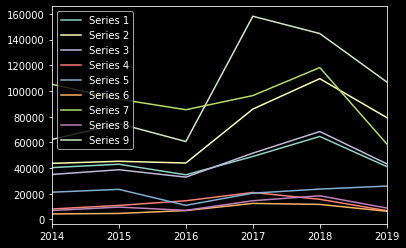

In [16]:
job_year_level.index = ["Series " + str(j) for j in range(1,10)]
fig = job_year_level.transpose().plot()

In [18]:
fig.savefig("export.png", dpi=300)

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

In [8]:
jobs_bycity = jobs2014.groupby("city").count()["title"]
jobs_bycity = pd.concat([jobs_bycity, jobs2015.groupby("city").count()["title"]], axis=1)
jobs_bycity = pd.concat([jobs_bycity, jobs2016.groupby("city").count()["title"]], axis=1)
jobs_bycity = pd.concat([jobs_bycity, jobs2017.groupby("city").count()["title"]], axis=1)
jobs_bycity = pd.concat([jobs_bycity, jobs2018.groupby("city").count()["title"]], axis=1)
jobs_bycity = pd.concat([jobs_bycity, jobs2019.groupby("city").count()["title"]], axis=1)
#jobs_bycity.join(jobs2015.groupby("city").count()["title"])
#jobs2015.groupby("city").count()["title"]
jobs_bycity

,title,title,title,title,title,title
Abberley,NaN,1.0,NaN,NaN,NaN,NaN
Abbey,13.0,NaN,NaN,8.0,NaN,NaN
Abbey Wood,NaN,202.0,49.0,7.0,3.0,8.0
Abbeydale,NaN,NaN,2.0,1.0,1.0,NaN
Abbeyleix,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...
Ystalyfera Ed,16.0,NaN,NaN,NaN,NaN,NaN
Ystrad,NaN,1.0,NaN,NaN,NaN,NaN
Ystrad Mynach,NaN,17.0,5.0,1.0,4.0,2.0
Ystradgynlais,NaN,20.0,16.0,2.0,NaN,NaN


In [24]:
jobs_bycity.columns = [2014,2015,2016,2017,2018,2019]
jobs_bycity

,2014,2015,2016,2017,2018,2019
Abberley,NaN,1.0,NaN,NaN,NaN,NaN
Abbey,13.0,NaN,NaN,8.0,NaN,NaN
Abbey Wood,NaN,202.0,49.0,7.0,3.0,8.0
Abbeydale,NaN,NaN,2.0,1.0,1.0,NaN
Abbeyleix,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...
Ystalyfera Ed,16.0,NaN,NaN,NaN,NaN,NaN
Ystrad,NaN,1.0,NaN,NaN,NaN,NaN
Ystrad Mynach,NaN,17.0,5.0,1.0,4.0,2.0
Ystradgynlais,NaN,20.0,16.0,2.0,NaN,NaN


In [36]:
towns = pd.read_csv("uk_towns_and_counties.csv")
towns.head()

,id,town,county
0,1,Well,Lincolnshire
1,2,Well,North Yorkshire
2,3,Well,Hampshire
3,4,Welhambridge,North Yorkshire
4,5,Welham Green,Hertfordshire


In [49]:
towns = pd.read_csv("uk_towns_and_counties.csv")
JOBS = [jobs2014,jobs2015,jobs2016,jobs2017,jobs2018,jobs2019]
towns = towns.rename(index = str, columns = {'town':'city'})
#jobs2014.columns
#jobs2014 = jobs2014.merge(towns, on = 'city', how = 'left')
for j in range(len(JOBS)):
    JOBS[j] = JOBS[j].merge(towns, on = 'city', how = 'left')

In [39]:
jobs_bycounty = JOBS[0].groupby("county").count()["title"]

jobs_bycounty = pd.concat([jobs_bycounty, JOBS[1].groupby("county").count()["title"]], axis=1)
jobs_bycounty = pd.concat([jobs_bycounty, JOBS[2].groupby("county").count()["title"]], axis=1)
jobs_bycounty = pd.concat([jobs_bycounty, JOBS[3].groupby("county").count()["title"]], axis=1)
jobs_bycounty = pd.concat([jobs_bycounty, JOBS[4].groupby("county").count()["title"]], axis=1)
jobs_bycounty = pd.concat([jobs_bycounty, JOBS[5].groupby("county").count()["title"]], axis=1)
#jobs_bycity.join(jobs2015.groupby("city").count()["title"])
#jobs2015.groupby("city").count()["title"]
jobs_bycounty.columns = [2014,2015,2016,2017,2018,2019]
jobs_bycounty

,2014,2015,2016,2017,2018,2019
county,,,,,,
Aberdeenshire,5768.0,4157,2924.0,4337.0,6105,4638
Anglesey/Sir Fon,6.0,16,28.0,80.0,235,123
Angus,804.0,1008,944.0,1447.0,1787,1415
Argyll and Bute,1237.0,1448,1329.0,1996.0,2648,1590
Ayrshire,850.0,867,598.0,1168.0,1636,999
...,...,...,...,...,...,...
West Yorkshire,17459.0,10650,8437.0,15522.0,17337,13898
Western Isles,327.0,328,222.0,699.0,895,470
Wiltshire,9531.0,8966,6175.0,10054.0,10230,8437


In [42]:
#jobs_bycity.columns = [2014,2015,2016,2017,2018,2019]
jobs_bycity[2015].sum()

287364.0

In [3]:
postcode = pd.read_csv("National_Statistics_Postcode_Lookup_UK.csv")
